# Problem Set 4

### CSCI 5352

### Ben Braun

## Problem 1

$e_{rr}$ is the diagonal for region $r$

$a_{r}$ is the row sum for region $r$

$Q_{r}=e_{rr}-a_{r}^2$

After transforming $\mathcal{M}$ into an undirected matrix, we can directly calculate $e_{rr}$, $a_{r}$, and $Q_{r}$ from the matrix:


| $\mathcal{M}$ | Northeast | Midwest | South | West  | Canada |   | $e_{rr}$ | $a_{r}$ | $Q_{r}$ |
| ------------- | --------- | ------- | ----- | ----- | ------ | - | -------  | ------- | ------- |
| **Northeast** | 0.238     | 0.084   | 0.099 | 0.104 | 0.028  |   | 0.238    | 0.553   | -0.068  |
| **Midwest**   | 0.084     | 0.134   | 0.088 | 0.059 | 0.016  |   | 0.134    | 0.381   | -0.011  |
| **South**     | 0.099     | 0.088   | 0.166 | 0.067 | 0.011  |   | 0.166    | 0.262   | 0.097   |
| **West**      | 0.104     | 0.059   | 0.067 | 0.146 | 0.016  |   | 0.146    | 0.392   | -0.008  |
| **Canada**    | 0.028     | 0.016   | 0.011 | 0.016 | 0.170  |   | 0.170    | 0.241   | 0.112   |

$Q=\sum_{r}Q_{r}=0.122$.

The overall assortativity of the system is somewhat low, with a weak community structure. Faculty are slightly more likely to remain within their region after their PhD. According to the $Q_{r}$ values, the South and Canada have the strongest community structures and drive the overall assortativity of the system, while the other regions are mildly disassortative and prefer to leave their region.

## Problem 2


#### Part A
For the divided network, we can find the values of $e_{r}$ and $a_{r}$ in terms of $n$ and $g$.

| Node Group | $e_{r}$               | $a_{r}$ |
| ---------- | --------------------- | ------- |
| 1          | $\frac{g-1}{n-1}$     | $\frac{2g-1}{2(n-1)}$   |
| 2          | $\frac{n-g-1}{n-1}$   | $\frac{2(n-g)-1}{2(n-1)}$   |


Similar to problem 1, we can then use the equation for $Q$ in terms of $e_{r}$ and $a_{r}$ to find the modularity in terms of $n$ and $g$.

Below is my derivation, with work shown (slightly condensed for brevity):

$$
\begin{align*}
Q&=\sum_{r}(e_r-a_r^2) \\
&=[\frac{g-1}{n-1}-(\frac{2g-1}{2(n-1)})^2]+[\frac{n-g-1}{n-1}-(\frac{2(n-g)-1}{2(n-1)})^2] \\
&=\frac{4(g-1)(n-1)-4g^2+4g-1}{4(n-1)^2}+\frac{4(n-g-1)(n-1)-4(n-g)^2+4(n-g)-1}{4(n-1)^2} \\
&=\frac{4gn-4n-4g^2+3-4n+4ng-4g^2+3}{4(n-1)^2} \\
&=\frac{-8g^2+8ng-8n+6}{4(n-1)^2} \\
&=\frac{-4g^2+4ng-4n+3}{2(n-1)^2} \\
\end{align*}
$$


#### Part B
A split exactly down the middle gives us $g=\frac{n}{2}$.

To find the optimal modularity, we can treat $Q$ as a function of $g$:
$$
Q(g)=\frac{-4g^2+4ng-4n+3}{2(n-1)^2}
$$

We can then take the derivative of $Q$ with respect to $g$:
$$
\begin{align*}
\frac{dQ}{dg}&=\frac{-8g+4n}{2(n-1)^2} \\
&=\frac{4n-8g}{2(n-1)^2} \\
&=\frac{2n-4g}{(n-1)^2}
\end{align*}
$$

Setting $\frac{dQ}{dg}=0$ gives us the critical point:
$$
\begin{align*}
2n-4g&=0 \\
g&=\frac{n}{2}
\end{align*}
$$

We can confirm this is a maximum by taking the second derivative:
$$
\frac{d^2Q}{dg^2}=\frac{-4}{(n-1)^2}<0
$$

Since the second derivative is negative, the function is concave and $g=\frac{n}{2}$ is a maximum. Therefore, the optimal modularity is achieved when the network is split exactly down the middle.

Note that this applies specifically to even $n$ because odd $n$ would make a perfect split down the middle impossible.

## Problem 3

#### Part A

We find $e_{rs}$ by counting up the edges between groups $r$ and $s$. We then count the total possible edges between $r$ and $s$ to find $n_{rs}$. Their ratio gives us the maximum likelihood mixing matrix:

| $e_{rs}/n_{rs}$ | Orange | Teal   |
| -------------   | ------ | ------ |
| **Orange**      | $4/10$ | $2/20$ |
| **Teal**        | ------ | $4/6$  |

We can then use the formula for the log likelihood, plugging in the values of $e_{rs}$ and $n_{rs}$ from the table:

$$
\begin{align*}
\ln\mathcal{L}&=\sum_{r,s} e_{rs}\ln\frac{e_{rs}}{n_{rs}}+(n_{rs}-e_{rs})\ln(\frac{n_{rs}-e_{rs}}{n_{rs}}) \\
&=(4\ln\frac{4}{10}+6\ln\frac{6}{10})+(2\ln\frac{2}{20}+18\ln\frac{18}{20})+(4\ln\frac{4}{6}+2\ln\frac{2}{6}) \\
&\approx -17.0509
\end{align*}
$$

#### Part B

For the DC-SBM mixing matrix, we need to count the stubs rather than the edges within and between groups. Then we calculate $\kappa_{r}$ for each group by summing the stubs for that group.

| $\omega_{rs}$ | Orange | Teal   | $\kappa_{r}$ |
| ------------- | ------ | ------ | ------------ |
| **Orange**    | $8$    | $2$    | $10$         |
| **Teal**      | $2$    | $8$    | $10$         |

We then apply the given formula for log likelihood:

$$
\begin{align*}
\ln\mathcal{L}&=\sum_{r,s} \omega_{rs}\ln\frac{\omega_{rs}}{\kappa_{r}\kappa_{s}} \\
&=(8\ln\frac{8}{10\times 10})+(2\ln\frac{2}{10\times 10})+(2\ln\frac{2}{10\times 10})+(8\ln\frac{8}{10\times 10}) \\
&\approx -56.0598
\end{align*}
$$

#### Part C

The SBM is $\exp(56.0598-17.0509)\approx 8\times 10^{16}$ times more likely than the DC-SBM model to generate the observed network.

## Problem 4



In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown

In [2]:
def logLikelihood(G,z_t,c):
	# G: the graph (dict)
	# z_t: the current partition
	# c: the number of groups

	# Initialize the within- and between-group degrees
	omegas = {(g1,g2): 0 for g1 in list(range(1,c+1)) for g2 in list(range(1,c+1))}

	# Iterate over the nodes
	for node in G:
		# Iterate over the neighbors of the node
		for neighbor in G[node]:
			# Add the stub to the sum between the groups (including same groups)
			omegas[(z_t[node],z_t[neighbor])] += 1
	
	# Calculate log likelihood: \ln\mathcal{L}&=\sum_{r,s} \omega_{rs}\ln\frac{\omega_{rs}}{\kappa_{r}\kappa_{s}}
	kappa = {g: sum([omegas[(g,g2)] for g2 in list(range(1,c+1))]) for g in list(range(1,c+1))}
	logL = sum([
		omegas[(g1,g2)]*np.log(omegas[(g1,g2)]/(kappa[g1]*kappa[g2]))
		for g1,g2 in omegas
		if omegas[(g1,g2)] > 0
	])

	# Return the log-likelihood
	return logL

def makeAMove(G,z_t,c,f):
	# G: the graph (dict)
	# z_t: the current partition
	# c: the number of groups
	# f: "is_frozen" binary vector3

	best_ll = logLikelihood(G,z_t,c)
	best_move = None

	# Iterate over the n-t unfrozen nodes (f_i == 0) and c-1 possible single-node moves for each node
	valid_nodes = [node for node in G if f[node] == 0]

	for node in valid_nodes:
		for group in [g for g in list(range(1,c+1)) if g != z_t[node]]:
			
			# Make the move
			z_t_new = z_t.copy()
			z_t_new[node] = group

			# Compute the new log-likelihood
			ll = logLikelihood(G,z_t_new,c)
			
			if ll > best_ll:
				best_ll = ll
				best_move = (node,group)
	
	return best_ll, best_move


# # make a test graph of 2 triangles connected by a single edge
# G = {1: [2, 3], 2: [1, 3], 3: [1, 2, 4], 4: [3, 5, 6], 5: [4, 6], 6: [4, 5]}
# z_t = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 1}
# c = 2
# f = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

# best_ll, best_move = makeAMove(G,z_t,c,f)

# G_nx = nx.Graph(G)
# colors = [z_t[node] for node in G_nx.nodes()]
# nx.draw(G_nx, with_labels=True, node_color=colors, cmap=plt.cm.tab20, font_color='white')
# plt.show()

# z_t[best_move[0]] = best_move[1]

# G_nx = nx.Graph(G)
# colors = [z_t[node] for node in G_nx.nodes()]
# nx.draw(G_nx, with_labels=True, node_color=colors, cmap=plt.cm.tab20, font_color='white')
# plt.show()

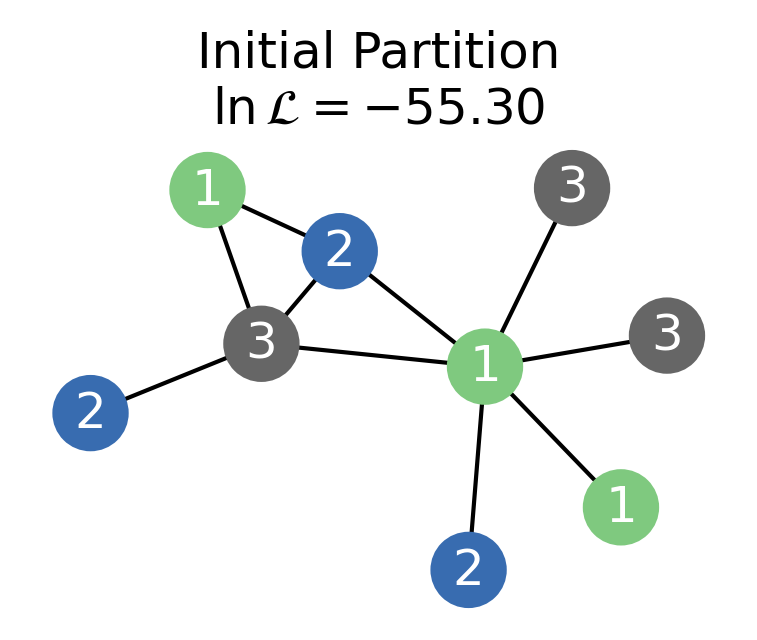

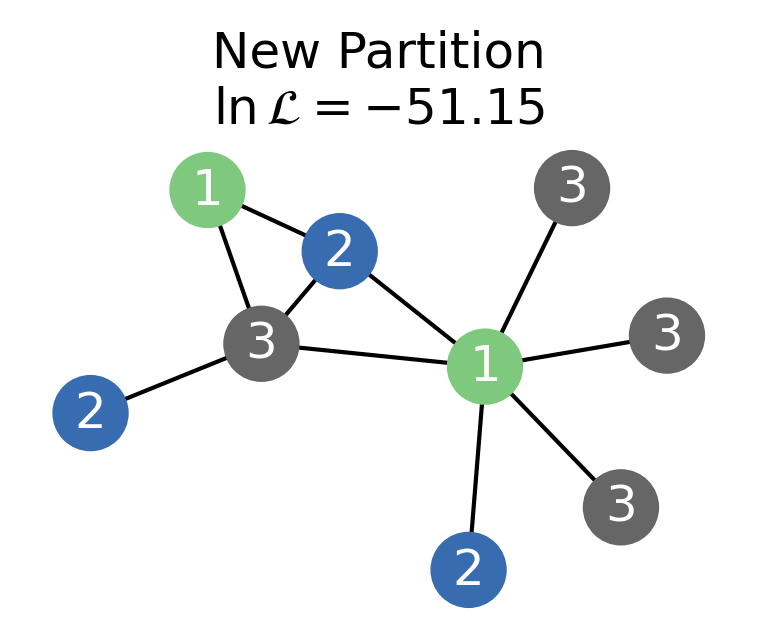

In [16]:
# Apply to the graph from the example
G = {
	1: [2,3,6,7,8,9],
	2: [1],
	3: [1,4,6],
	4: [3,6],
	5: [6],
	6: [1,3,4,5],
	7: [1],
	8: [1],
	9: [1],
}
# 3 partitions
c = 3
# random initial partition (make sure that all groups are represented)
while True:
	z_t = {i: np.random.choice(list(range(1,c+1))) for i in G.keys()}
	if len(set(z_t.values())) == c:
		break
# all nodes are unfrozen except f_2
f = {i: 0 for i in G.keys()}
f[2] = 1

# visualize the graph
G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [z_t[node] for node in G_nx.nodes()]
labels = {node: z_t[node] for node in G_nx.nodes()}  # Use group numbers as labels

fig, ax = plt.subplots(figsize=(3,2), dpi=300)
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout)
plt.title('Initial Partition\n'+'$\ln\mathcal{L} = '+f'{logLikelihood(G,z_t,c):0.2f}$')
plt.show()

# make a move
ll, move = makeAMove(G,z_t,c,f)

# visualize the graph
z_t[move[0]] = move[1]
colors = [z_t[node] for node in G_nx.nodes()]
labels = {node: z_t[node] for node in G_nx.nodes()}  # Use group numbers as labels

fig, ax = plt.subplots(figsize=(3,2), dpi=300)
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout)
plt.title('New Partition\n'+'$\ln\mathcal{L} = '+f'{logLikelihood(G,z_t,c):0.2f}$')
plt.show()


In [4]:
def runOnePhase(G,z_0,c):
	# G: the graph (dict)
	# z_0: the initial partition
	# c: the number of groups

	# Initialize the current partition and the frozen nodes
	z_t = z_0.copy()
	f = {i: 0 for i in G.keys()}

	# Initialize the trackers
	initial_ll = logLikelihood(G,z_0,c)
	best_ll = -np.inf
	best_z = z_0.copy()
	halt = False # We halt if the final log-likelihood is <= the initial log-likelihood
	ells = [initial_ll]

	# Iterate until all nodes are frozen
	for i in range(len(G.keys())):
		# Make a move
		ll, move = makeAMove(G,z_t,c,f)
		# Save the LL
		ells.append(ll)
		if ll == -np.inf:
			print(ll,move,z_t,f)
		if move is not None:
			# Apply the move
			z_t[move[0]] = int(move[1])
			# Freeze the corresponding node
			f[move[0]] = 1
		# Save it it's the best partition and likelihood so far
		if ll > best_ll:
			best_ll = ll
			best_z = z_t.copy()

		
	# Halt if we didn't improve the log-likelihood
	if best_ll <= initial_ll:
		halt = True
	
	return best_z, halt, ells



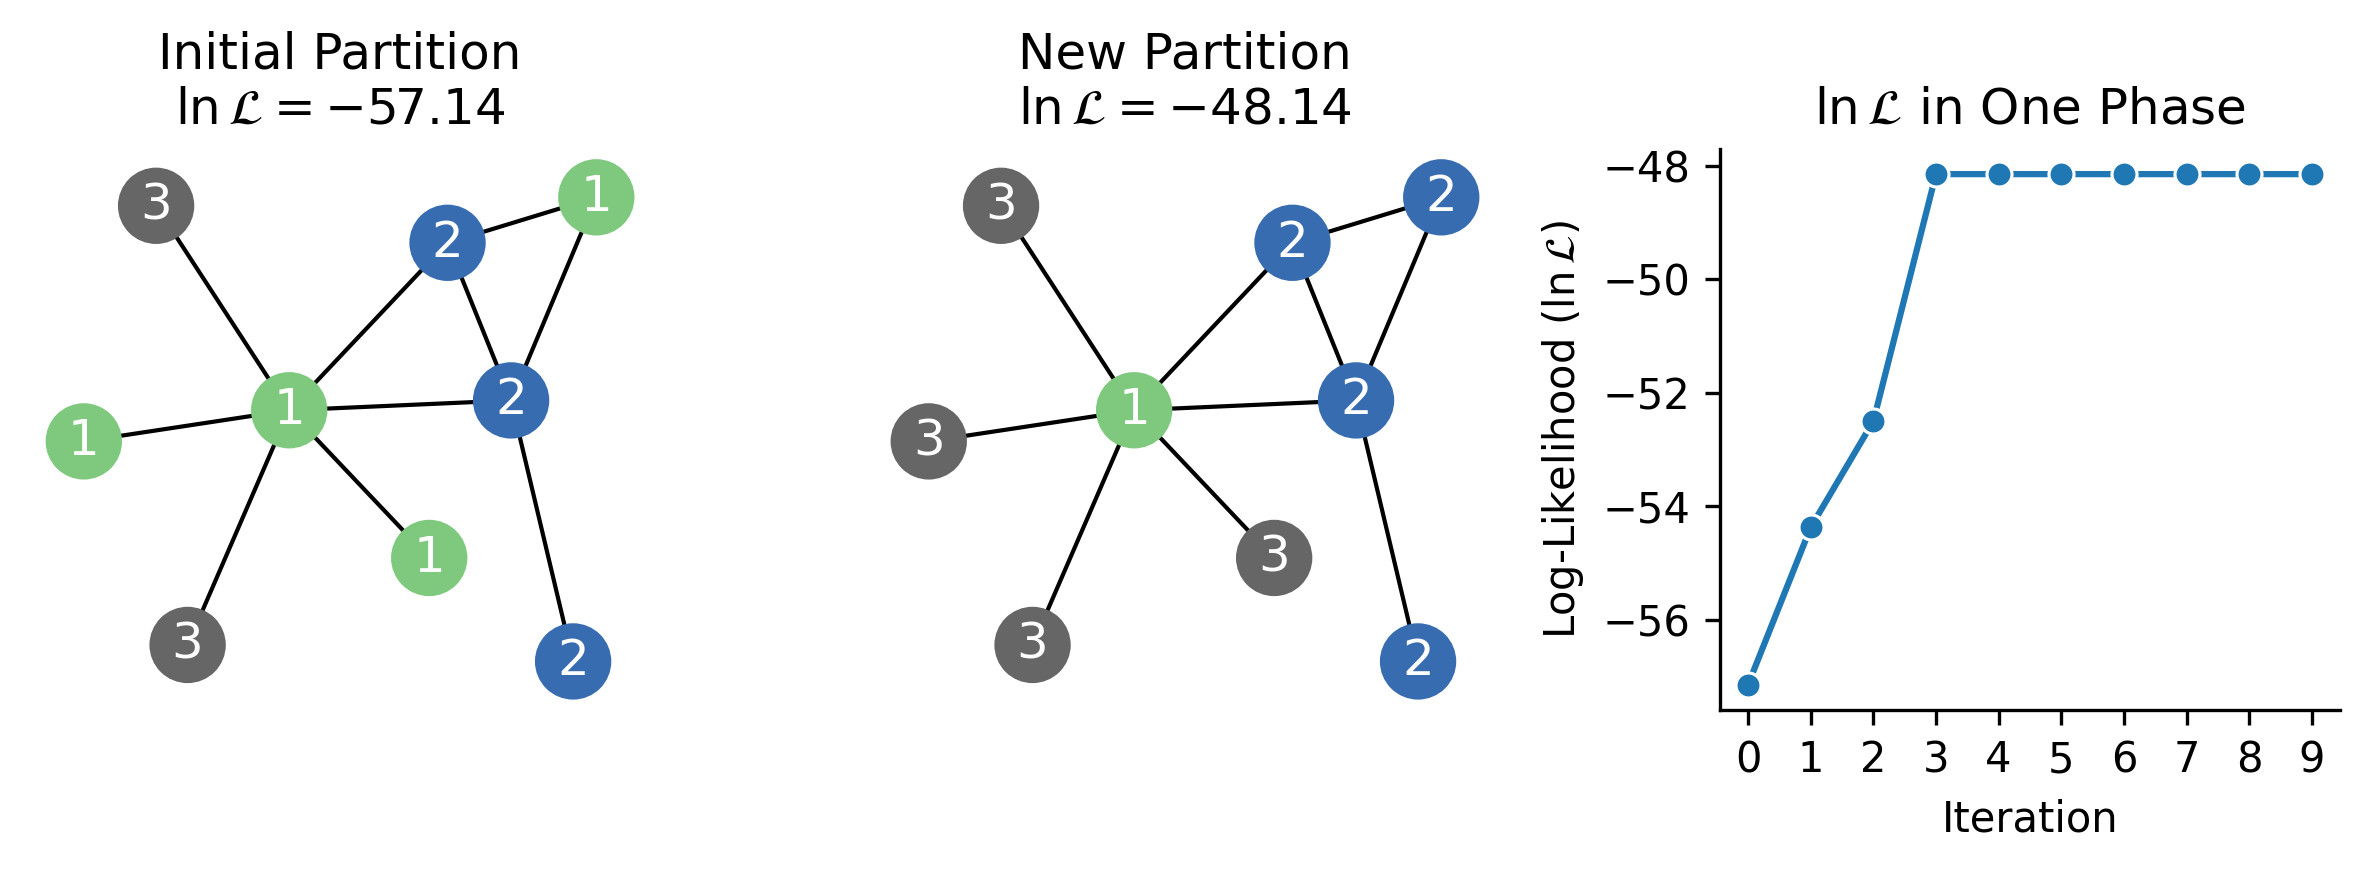

In [20]:
# Apply to the graph from the example
G = {
	1: [2,3,6,7,8,9],
	2: [1],
	3: [1,4,6],
	4: [3,6],
	5: [6],
	6: [1,3,4,5],
	7: [1],
	8: [1],
	9: [1],
}
# 3 partitions
c = 3
# random initial partition (make sure that all groups are represented)
while True:
	z_t = {i: int(np.random.choice(list(range(1,c+1)))) for i in G.keys()}
	if len(set(z_t.values())) == c:
		break


fig, axes = plt.subplots(1,3,figsize=(8,3), dpi=300)

G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [z_t[node] for node in G_nx.nodes()]
labels = {node: z_t[node] for node in G_nx.nodes()}  # Use group numbers as labels
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout,ax=axes[0])
axes[0].set_title(f'Initial Partition\n'+'$\ln\mathcal{L} = '+f'{logLikelihood(G,z_t,c):0.2f}$')

best_z,halt,ells = runOnePhase(G,z_t,c)

colors = [best_z[node] for node in G_nx.nodes()]
labels = {node: best_z[node] for node in G_nx.nodes()}  # Use group numbers as labels
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout,ax=axes[1])
axes[1].set_title(f'New Partition\n'+'$\ln\mathcal{L} = '+f'{logLikelihood(G,best_z,c):0.2f}$')

# Plot ells
sns.lineplot(ells,marker='o',ax=axes[2])
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Log-Likelihood ($\ln\mathcal{L}$)')
axes[2].set_title('$\ln\mathcal{L}$ in One Phase')
axes[2].set_xticks(list(range(len(ells))))
sns.despine()
fig.tight_layout()
plt.show()


In [21]:
def fitDCSBM(G,c,T):
	# G: the graph (dict)
	# c: the number of groups
	# T: maximum allowed phases

	# Initialize the random partition
	while True:
		z_0 = {i: int(np.random.choice(list(range(1,c+1)))) for i in G.keys()}
		if len(set(z_0.values())) == c:
			break

	halt = False
	ells = [logLikelihood(G,z_0,c)]
	n_phases = 0

	z_t = z_0.copy()

	while not halt and n_phases < T:
		z_t, halt, ells_phase = runOnePhase(G,z_t,c)
		n_phases += 1
		ells.append(ells_phase[-1])
	
	return z_t, n_phases, ells


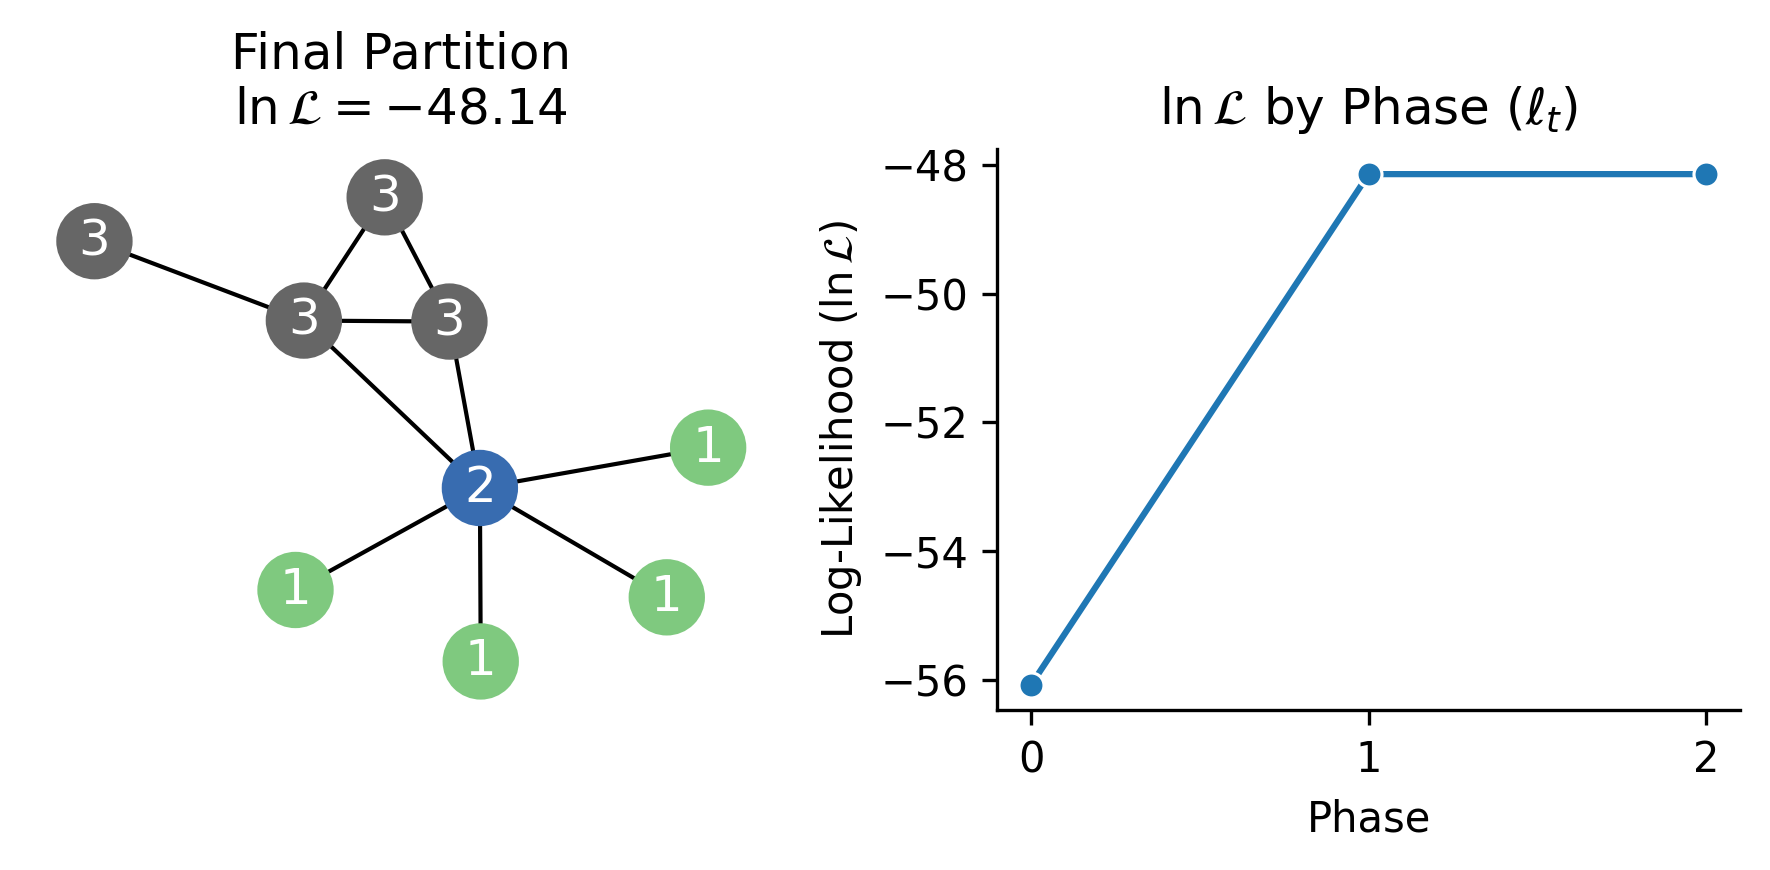

#### $\omega$ Matrix:

,Group 1,Group 2,Group 3
Group 1,0,4,0
Group 2,4,0,2
Group 3,0,2,8


#### $\kappa$ Vector: [4, 6, 10]

In [28]:
# Apply to the graph from the example
G = {
	1: [2,3,6,7,8,9],
	2: [1],
	3: [1,4,6],
	4: [3,6],
	5: [6],
	6: [1,3,4,5],
	7: [1],
	8: [1],
	9: [1],
}
# 3 partitions
c = 3
# 30 phases
T = 30

z_t, n_phases, ells = fitDCSBM(G,c,T)

fig, axes = plt.subplots(1,2,figsize=(6,3), dpi=300)

G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [z_t[node] for node in G_nx.nodes()]
labels = {node: z_t[node] for node in G_nx.nodes()}  # Use group numbers as labels
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout,ax=axes[0])
axes[0].set_title(f'Final Partition\n'+'$\ln\mathcal{L} = '+f'{logLikelihood(G,z_t,c):0.2f}$')

# Plot ells
sns.lineplot(ells,marker='o',ax=axes[1])
axes[1].set_xlabel('Phase')
axes[1].set_ylabel('Log-Likelihood ($\ln\mathcal{L}$)')
axes[1].set_title('$\ln\mathcal{L}$ by Phase ($\ell_{t}$)')
axes[1].set_xticks(list(range(len(ells))))
sns.despine()
fig.tight_layout()
plt.show()


# Calculate omega and kappa for final output
# (copied from logLikelihood function)
omegas = {(g1,g2): 0 for g1 in list(range(1,c+1)) for g2 in list(range(1,c+1))}
for node in G:
	for neighbor in G[node]:
		omegas[(z_t[node],z_t[neighbor])] += 1
kappa = {g: sum([omegas[(g,g2)] for g2 in list(range(1,c+1))]) for g in list(range(1,c+1))}

# Format omega into a table
omega_df = pd.DataFrame(
	[[omegas.get((i, j), 0) for j in range(1, c+1)] for i in range(1, c+1)],
	index=[f"Group {i}" for i in range(1, c+1)],
	columns=[f"Group {j}" for j in range(1, c+1)]
)

# Display omega table with markdown
display(Markdown("#### $\omega$ Matrix:"))
display(omega_df)

# Format kappa as a vector
kappa_str = ", ".join([f"{kappa[i]}" for i in range(1, c+1)])
display(Markdown("#### $\kappa$ Vector: "+f"[{kappa_str}]"))


 For this relatively small graph, we achieve the maximum log-likelihood very fast - usually within 1-2 phases, as shown by the $\ell_t$ plot. My guess is that this is mostly a function of how few nodes need to be changed. The partition itself is pretty good, separating out groups 2 and 3 well. However, this graph is probably better suited to a 2-group partition, so groups 1 and 3 end up being a bit awkward here.

100%|██████████| 25/25 [00:00<00:00, 29.36it/s]


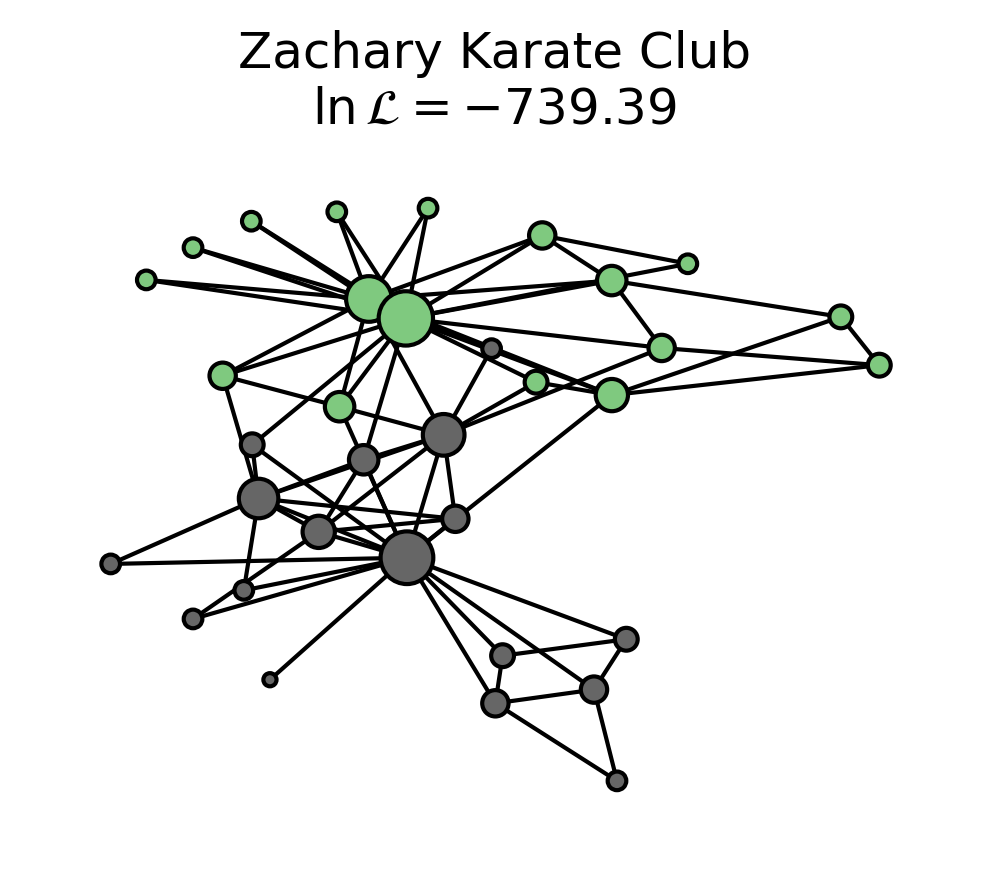

In [31]:
from tqdm import tqdm
# Zachary Karate Club
G = nx.to_dict_of_lists(nx.karate_club_graph())

best_ll = -np.inf

for i in tqdm(range(25)):
	z_t, n_phases, ells = fitDCSBM(G,2,30)
	# print(f'Phase {i+1}: {n_phases} phases, final log-likelihood = {ells[-1]:0.2f}')
	if ells[-1] > best_ll:
		best_ll = ells[-1]
		best_z = z_t.copy()

fig, ax = plt.subplots(figsize=(4,3), dpi=300)

G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [best_z[node] for node in G_nx.nodes()]
labels = {node: '' for node in G_nx.nodes()}
nx.draw_networkx_nodes(G_nx, layout, cmap=plt.cm.Accent, node_size=[G_nx.degree[node]*10 for node in G_nx.nodes()], node_color=colors, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G_nx, layout, width=1)
ax.set_title(f'Zachary Karate Club\n'+'$\ln\mathcal{L} = '+f'{best_ll:0.2f}$')
plt.axis('off')

plt.show()

This algorithm worked very well on the Karate Club example, taking only around 20-25 runs to reliably produce the optimal partition. This is a lot fewer than I expected, although I suspect that larger graphs or graphs with more unusual structure may need more runs. Needing only a few runs suggests that the algorithm can converge on the optimal partition from a wide variety of random partitions.

In [9]:
# Load in the Hobbit coappearance net
hobbit = nx.Graph()
with open('hobbit.txt','r') as f:
	# Looks like this:
	# 0:AZ,TO
	# 0:BA,BF
	# 0:BA,BI
	for line in f:
		# split the line by the colon
		n1, n2 = line.split(':')[-1].strip().split(',')
		# add the edges to the graph
		hobbit.add_edge(n1,n2)

In [10]:
# Run DC-SBM
G = nx.to_dict_of_lists(hobbit)

best_ll = -np.inf
c = 3

for i in tqdm(range(50)):
	z_t, n_phases, ells = fitDCSBM(G,c,100)
	# print(f'Phase {i+1}: {n_phases} phases, final log-likelihood = {ells[-1]:0.2f}')
	if ells[-1] > best_ll:
		best_ll = ells[-1]
		best_z = z_t.copy()


100%|██████████| 50/50 [00:11<00:00,  4.34it/s]


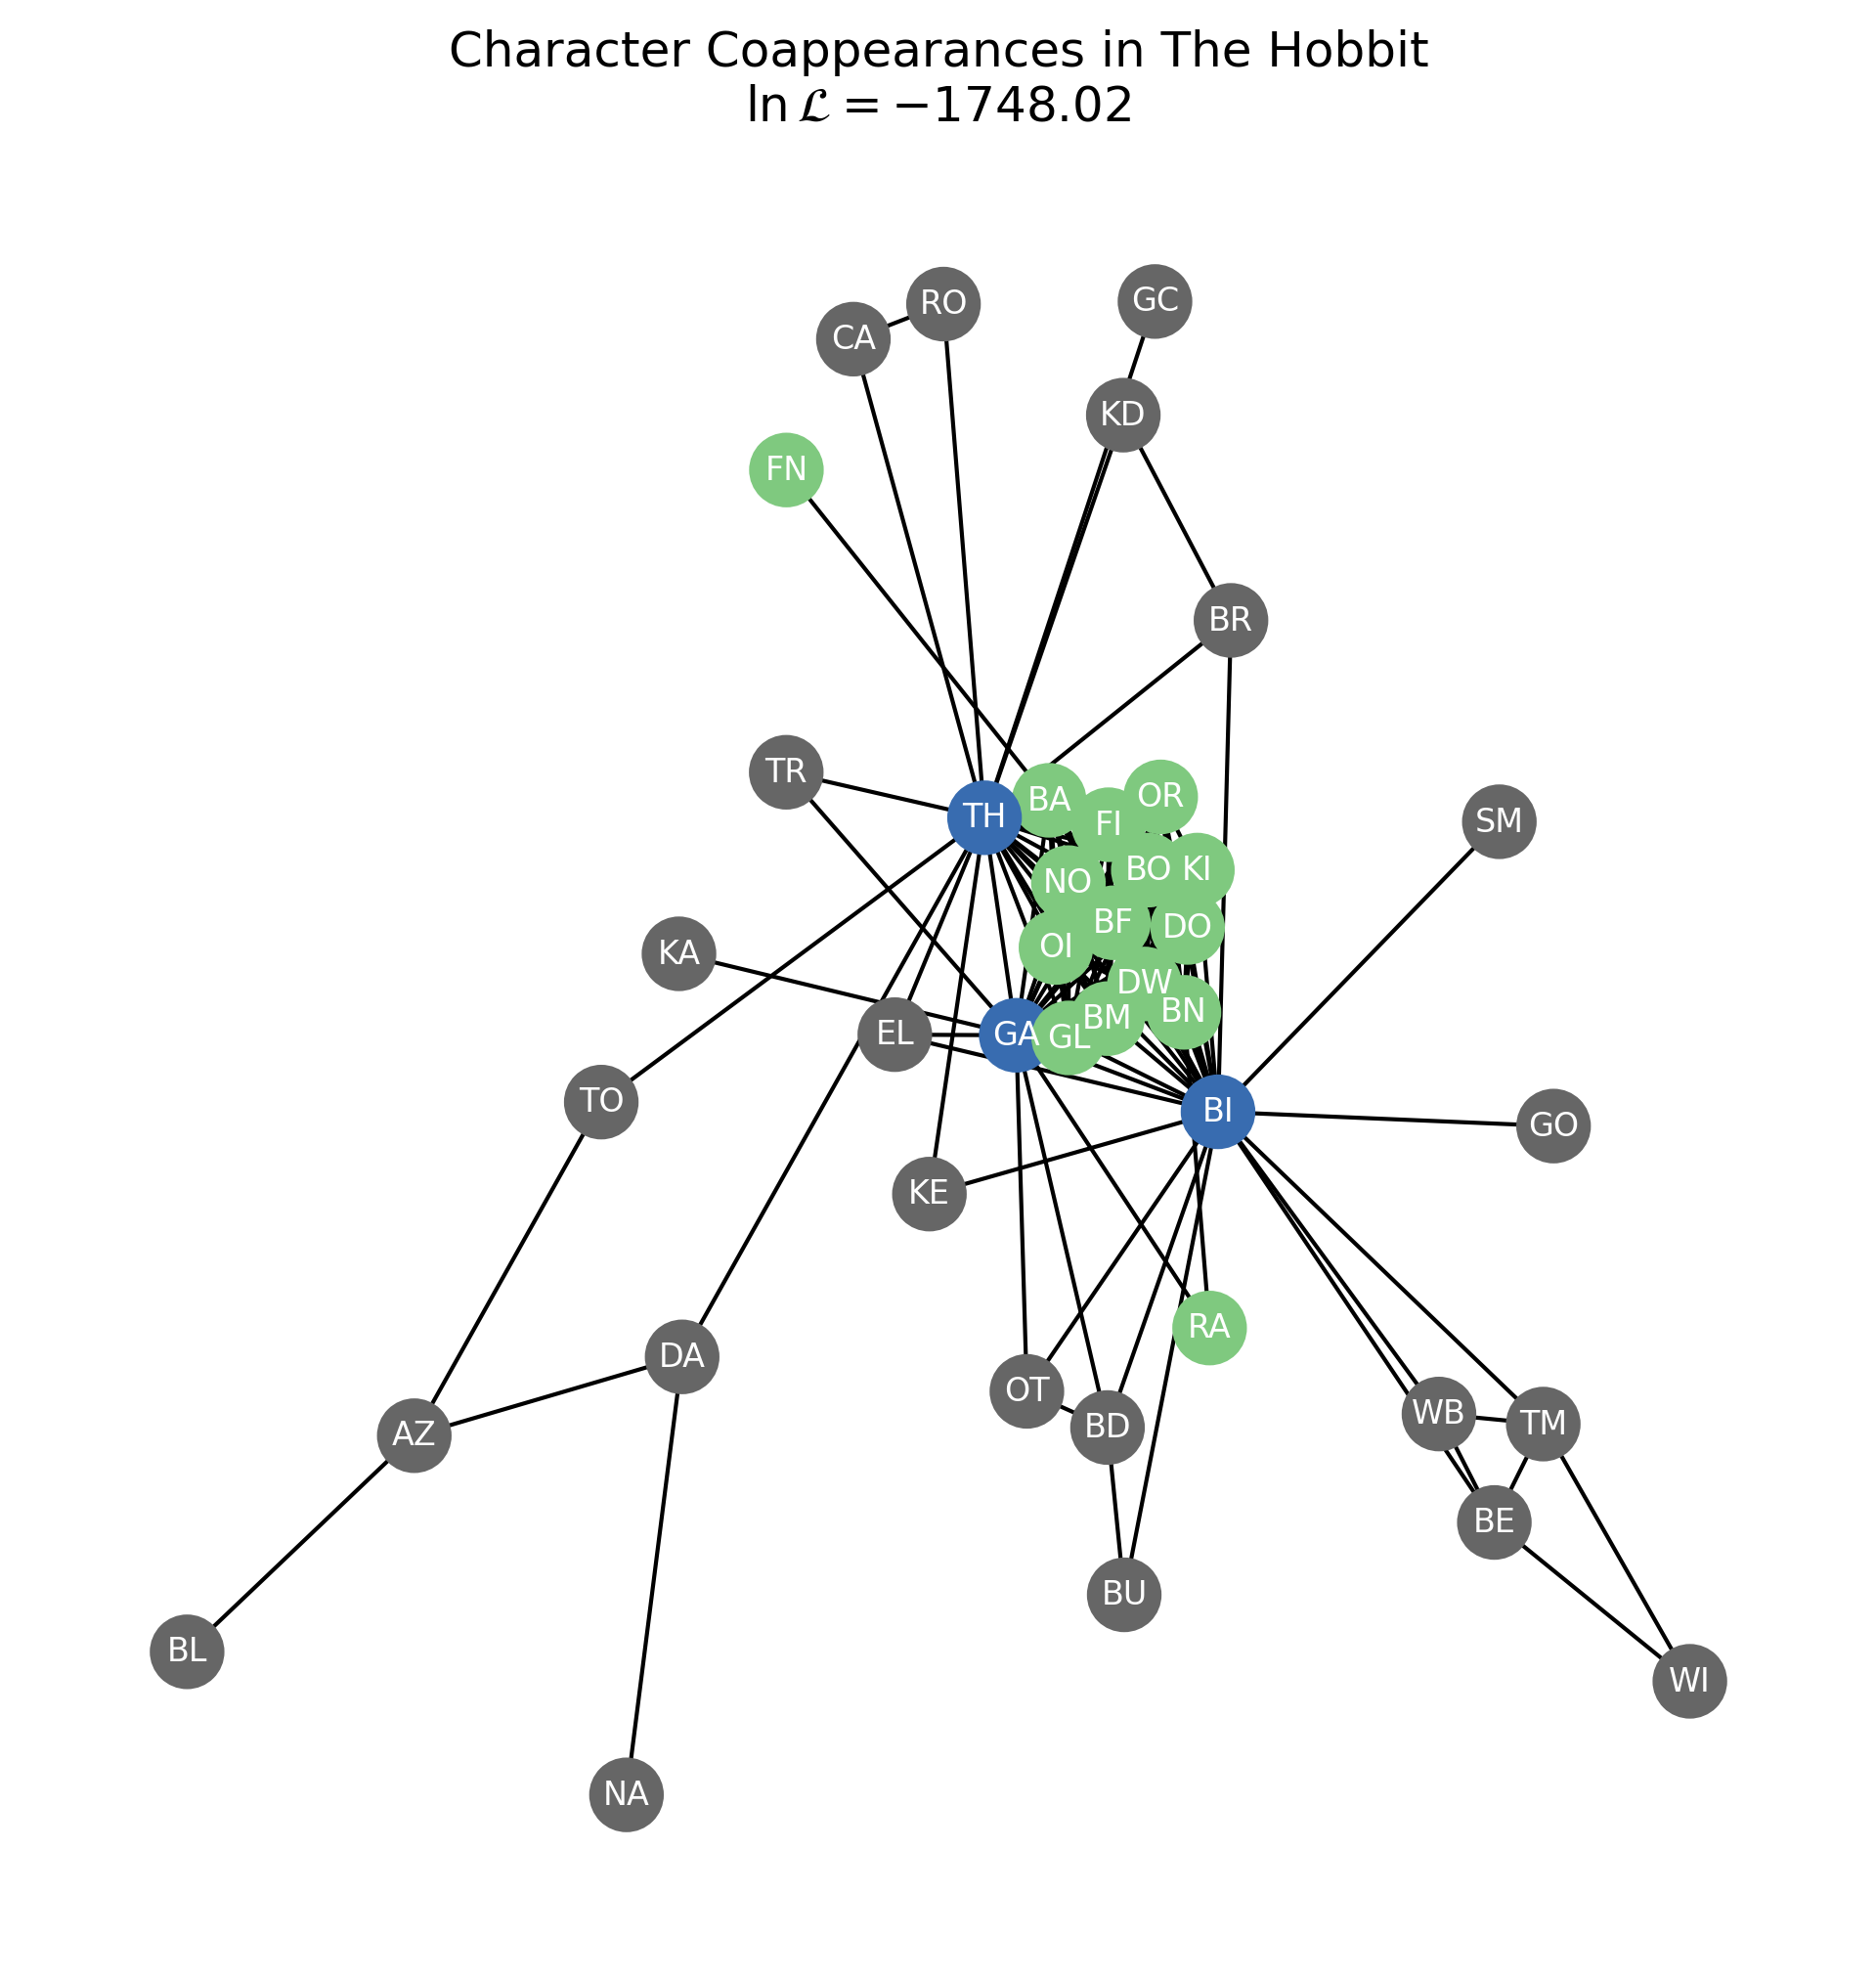

#### $\omega$ Matrix:

,Group 1,Group 2,Group 3
Group 1,156,0,40
Group 2,0,26,26
Group 3,40,26,6


#### $\kappa$ Vector: [196, 52, 72]

In [11]:

fig, ax = plt.subplots(figsize=(8,8), dpi=300)

G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [best_z[node] for node in G_nx.nodes()]
labels = {node: name for node,name in zip(G_nx.nodes(),G_nx.nodes())}
# nx.draw_networkx_nodes(G_nx, layout, cmap=plt.cm.Accent, node_size=[G_nx.degree[node]*10 for node in G_nx.nodes()], node_color=colors, edgecolors='black', linewidths=1)
# nx.draw_networkx_nodes(G_nx, layout, cmap=plt.cm.Accent, node_color=colors, edgecolors='black', linewidths=1)
# nx.draw_networkx_edges(G_nx, layout, width=1)
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout, font_size=8)
ax.set_title(f'Character Coappearances in The Hobbit'+'\n'+'$\ln\mathcal{L} = '+f'{best_ll:0.2f}$')
plt.axis('off')

plt.show()


# Calculate omega and kappa for final output
# (copied from logLikelihood function)
omegas = {(g1,g2): 0 for g1 in list(range(1,c+1)) for g2 in list(range(1,c+1))}
for node in G:
	for neighbor in G[node]:
		omegas[(z_t[node],z_t[neighbor])] += 1
kappa = {g: sum([omegas[(g,g2)] for g2 in list(range(1,c+1))]) for g in list(range(1,c+1))}

# Format omega into a table
omega_df = pd.DataFrame(
	[[omegas.get((i, j), 0) for j in range(1, c+1)] for i in range(1, c+1)],
	index=[f"Group {i}" for i in range(1, c+1)],
	columns=[f"Group {j}" for j in range(1, c+1)]
)


# Display omega table with markdown
display(Markdown("#### $\omega$ Matrix:"))
display(omega_df)

# Format kappa as a vector
kappa_str = ", ".join([f"{kappa[i]}" for i in range(1, c+1)])
display(Markdown("#### $\kappa$ Vector: "+f"[{kappa_str}]"))

This network clearly has a core-periphery structure, with a dense core formed by the ensemble cast of dwarves. This core is surrounded by the main characters, which are themselves surrounded by supporting characters.

In [12]:
# read monastery interactions (graphml)
monastery = nx.read_graphml('monastery interactions.graphml')

# Run DC-SBM
G = nx.to_dict_of_lists(monastery)

best_ll = -np.inf
c = 3

for i in tqdm(range(50)):
	z_t, n_phases, ells = fitDCSBM(G,c,100)
	# print(f'Phase {i+1}: {n_phases} phases, final log-likelihood = {ells[-1]:0.2f}')
	if ells[-1] > best_ll:
		best_ll = ells[-1]
		best_z = z_t.copy()


100%|██████████| 50/50 [00:00<00:00, 53.25it/s]


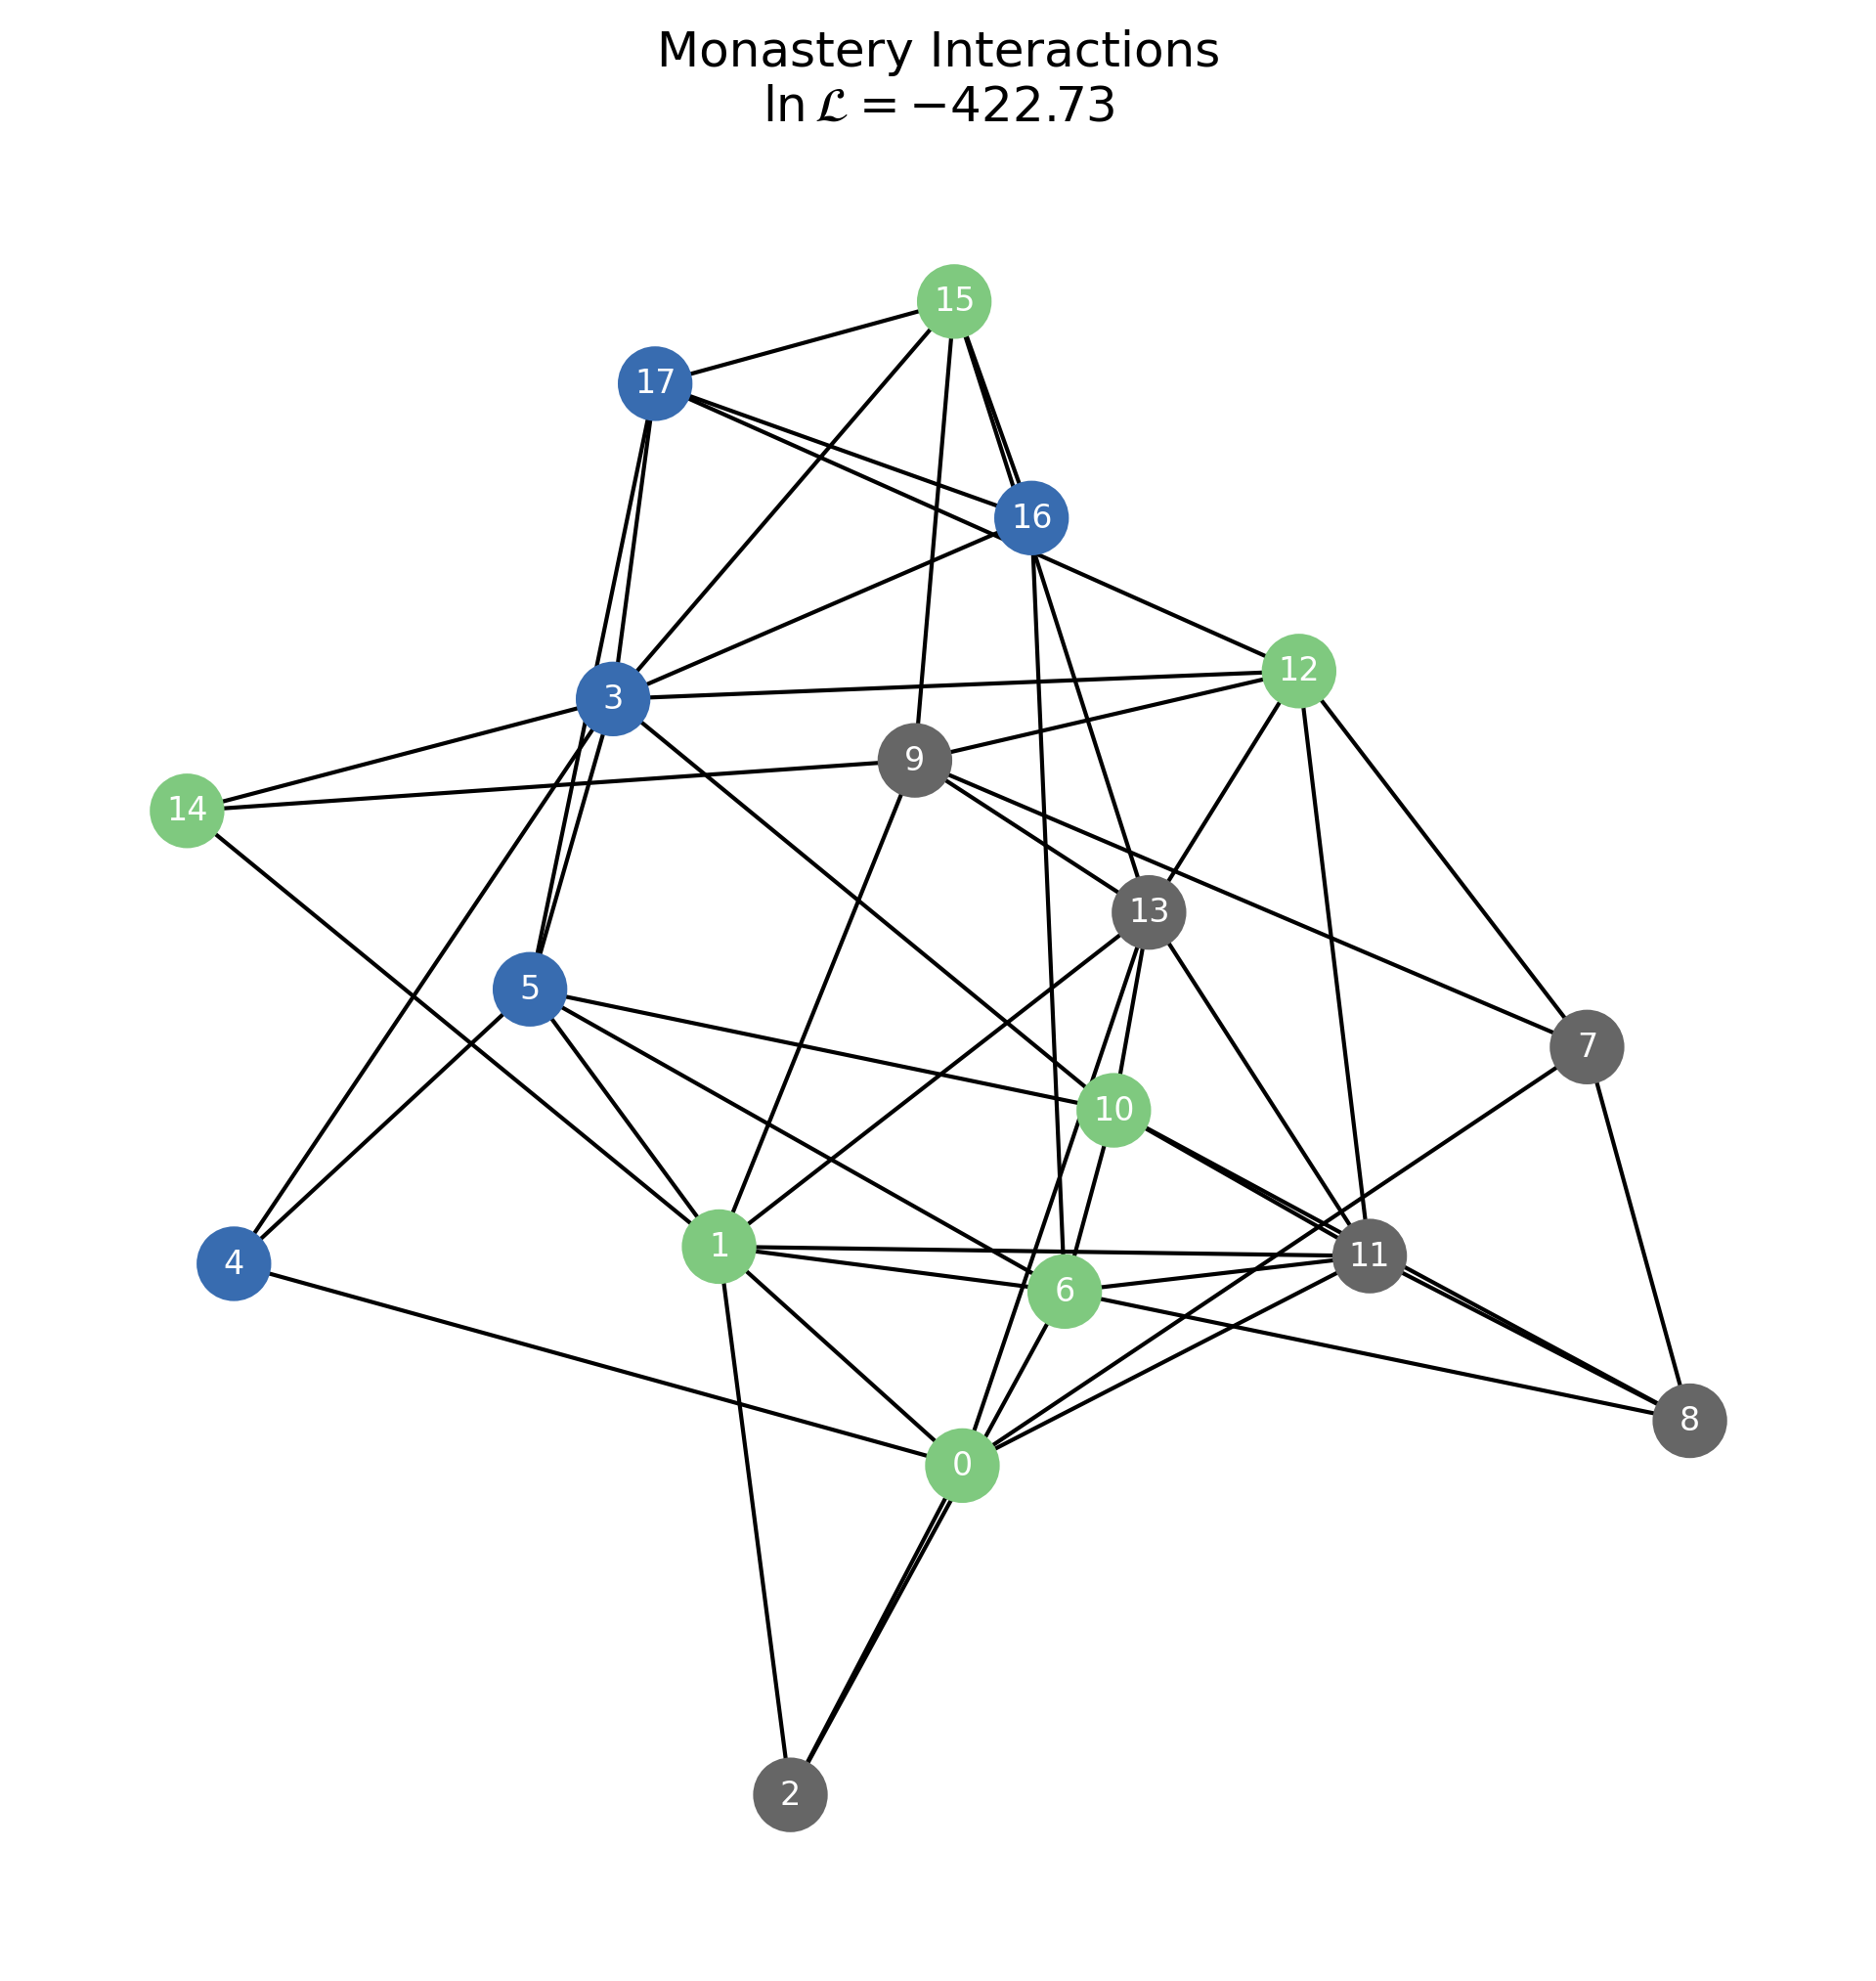

#### $\omega$ Matrix:

,Group 1,Group 2,Group 3
Group 1,14,16,15
Group 2,16,0,11
Group 3,15,11,0


#### $\kappa$ Vector: [45, 27, 26]

In [13]:

fig, ax = plt.subplots(figsize=(8,8), dpi=300)

G_nx = nx.Graph(G)
layout = nx.spring_layout(G_nx)

colors = [best_z[node] for node in G_nx.nodes()]
labels = {node: name for node,name in zip(G_nx.nodes(),G_nx.nodes())}
# nx.draw_networkx_nodes(G_nx, layout, cmap=plt.cm.Accent, node_size=[G_nx.degree[node]*10 for node in G_nx.nodes()], node_color=colors, edgecolors='black', linewidths=1)
# nx.draw_networkx_nodes(G_nx, layout, cmap=plt.cm.Accent, node_color=colors, edgecolors='black', linewidths=1)
# nx.draw_networkx_edges(G_nx, layout, width=1)
nx.draw(G_nx, with_labels=True, labels=labels, node_color=colors, cmap=plt.cm.Accent, font_color='white',pos=layout, font_size=8)
ax.set_title(f'Monastery Interactions'+'\n'+'$\ln\mathcal{L} = '+f'{best_ll:0.2f}$')
plt.axis('off')

plt.show()



# Initialize the within- and between-group degrees
omegas = {(g1,g2): 0 for g1 in list(range(1,c+1)) for g2 in list(range(1,c+1))}
for node in G:
	for neighbor in G[node]:
		omegas[(z_t[node],z_t[neighbor])] += 1
kappa = {g: sum([omegas[(g,g2)] for g2 in list(range(1,c+1))]) for g in list(range(1,c+1))}

# Format omega into a table
omega_df = pd.DataFrame(
	[[omegas.get((i, j), 0) for j in range(1, c+1)] for i in range(1, c+1)],
	index=[f"Group {i}" for i in range(1, c+1)],
	columns=[f"Group {j}" for j in range(1, c+1)]
)


# Display omega table with markdown
display(Markdown("#### $\omega$ Matrix:"))
display(omega_df)

# Format kappa as a vector
kappa_str = ", ".join([f"{kappa[i]}" for i in range(1, c+1)])
display(Markdown("#### $\kappa$ Vector: "+f"[{kappa_str}]"))

This graph appears to be largely disassortative, which may reflect the underlying social structure/hierarchy of the monastery. Notably, one group has many internal interactions while the other groups have none at all. I was not able to find any information about the dataset itself, but I would guess that the groups might loosely represent different roles or ranks within the monastery.